In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [8]:

# Récupérer les données
data = pd.read_csv("input/TP1_Heart_disease_reg.csv")
# iris = load_iris()
# L = iris.data
# y = iris.target



In [9]:
X = data.drop(["age"], axis=1)
y = data["age"]


In [10]:
print(X.shape)
X.info()
X.describe()

(303, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


# Modélisons

## Split des bases

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X.shape

(303, 12)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)
print('yTest set:', y_test.shape)
print('yTrain set:', y_train.shape)

Train set: (242, 12)
Test set: (61, 12)
yTest set: (61,)
yTrain set: (242,)


## Modèles

### 1er modèle : KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [34]:
# déclaration de l'intention de knn
knn = KNeighborsRegressor(n_neighbors=1)

In [38]:
# Entrainement du modèle
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [40]:
cross_val_score(KNeighborsRegressor(1), X_train, y_train, cv=5).mean()
# cross_val_score(KNeighborsRegressor(1), X_test, y_test, cv=5).mean()


-0.6583269323174271

# Evaluation

## Evaluation simple

In [41]:
# Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn.predict(X_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn.predict(X_test)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn.predict(X_test))))

Mean Absolute Error: 0.33999999999999997
Mean Squared Error: 0.1733333333333333
Root Mean Squared Error: 0.41633319989322654


### Déterminons le k optimal de façon manuelle

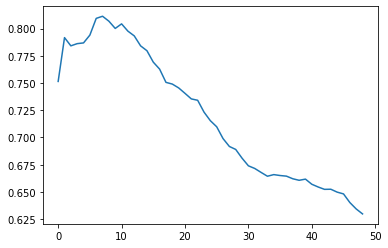

In [43]:
from sklearn.model_selection import cross_val_score
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsRegressor(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

## 2eme modèle

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor(max_depth=2, random_state=0)

In [27]:
# Entrainement du modèle
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [28]:
# Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf.predict(X_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf.predict(X_test)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))

Mean Absolute Error: 0.23532171510448158
Mean Squared Error: 0.0998381362737954
Root Mean Squared Error: 0.3159717333461894


## 3eme modèle : L'arbre de décision

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [30]:
# Entrainement du modèle
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
# Evaluation
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dt.predict(X_test)))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dt.predict(X_test)))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dt.predict(X_test))))

Mean Absolute Error: 0.39000000000000007
Mean Squared Error: 0.2343333333333333
Root Mean Squared Error: 0.4840798832148815


## 4eme modèle : Les regressions

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

### transformation des variables

In [33]:
# modèles

polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
    

### entrainement du modèle

In [34]:
linreg = LinearRegression()
linreg.fit(X_train_poly, y_train)

LinearRegression()

### Evaluation du modèle

In [35]:
y_train_predict = linreg.predict(X_train_poly)
y_test_predict = linreg.predict(X_test_poly)

mse_train = mean_squared_error(y_train, y_train_predict)
rmse_train = (np.sqrt(mse_train))
r2_train = r2_score(y_train, y_train_predict)


mse_test = mean_squared_error(y_test, y_test_predict)
rmse_test = (np.sqrt(mse_test))
r2_test = r2_score(y_test, y_test_predict)


In [36]:
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('mse du train {}'.format(mse_train), ' et test {}'.format(mse_test))
print("L'erreur quadratique moyenne du train est {}".format(rmse_train), " et test est {}".format(rmse_test))
print('le score R2 du train est {}'.format(r2_train), ' et test est {}'.format(r2_test))
print('\n')

La performance du modèle sur la base dapprentissage
--------------------------------------
mse du train 0.07625456189136942  et test 0.16515144353501762
L'erreur quadratique moyenne du train est 0.27614228559090587  et test est 0.4063882915820996
le score R2 du train est 0.8913283970971455  et test est 0.7239757485161918


